*Maestría de Ciencia de Datos - UNAJ*

# Trabajo Final: Aplicaciones de Ciencia de datos

*Febrero 2026*

## Integrantes
- Raul Burgos
- Mauro Cejas Marcovecchio
- Raul Muñoz
- Mirta Soto

## Descripción

El objetivo del siguiente trabajo es el análisis exploratorio, preprocesamiento de datos y el desarrollo de modelos de machine
learning sobre el dataset provisto por el Sistema de Información y Gestión Agrometeorológica (SIGA), del [Instituto Nacional de Tecnología Agropecuaria (INTA)](https://siga.inta.gob.ar/). Esta base de datos contiene información agrometeorológica de la Provincia de Corrientes, Argentina.


In [ ]:
# Apuntes 10/12:

# Tenemos que unificar los tres archivos
# Los datasets tienen fecha del 08-12-2025, están actualizados.
# Estos provienen de tres estaciones meteorológicas distintas, aunque cercanas.
# En la pestaña 'Datos estacion' nos da más información sobre cada estación.
# Los valores están tomados con medidas diarias, no corresponden a un momento específico del día.

# Variable objetivo: El valor que más nos va a interesar es la radiación global (columna AB)
# De las 500 estaciones meteorológicas del INTA, solo 40 tienen información sobre radiación global.
# ¿Podríamos predecir la radiación con menos cantidad de información que la que tenemos?
# Falta de sentido de agregar muchas variables. 
# Nos van a pedir que nos quedemos con las 4, 5, 6 variables que más servirían para modelar la radiación solar..

# Fecha: es fundamental por la época del año, aunque también se refleja en el resto de los parámetros.
# Podríamos hacer un análisis completo, o un análisis estacional 
# (filtrando los datos por estación codificando los valores de las fechas, por ejemplo).

# Vacíos en la variable Radiación_Global: vamos a tener que considerar solo aquellas filas que tengan valor en dicha columna para poder
# hacer el entrenamiento y el testeo. 

# Ver si rinde sumar el dato de latitud y longitud sobre los que se ubiquen las estaciones meteorológicas.

# No va  a haber algo que esté mal o que esté bien, sino que lo importante va a ser la explicación que demos de las decisiones que tomemos.
# El objetivo no es que las métricas sean perfectas, sino que empecemos a entender la aplicación de la ciencia de datos
# e ir aplicando las distintas herramientas que fuimos aprendiendo a lo largo de la maeestría
# El objetivo no es obtener las métricas óptimas, sino el desarrollo del trabajo.
# Preparación para la tesis.

In [2]:
# Apuntes 17/12:

# Últimas 4 clases del curso van a ser después del carnaval. 
# Las primeras dos clases van a ser de consulta y las otras dos de presentación
# Si ya tenemos cerrado el trabajo, se puede presentarlo durante la primera semana para sacarnoslo de encima.

# Con que un solo integrante lo suba al espacio de entrega, estamos bien. 

# Presentaciones de 10/15 min de largo. Resumidas. En Power Point.
# Fecha de entrega máxima: 22 de febrero, para que los profesores puedan leer el informe.
# Comprimido en winrar con apellidos de los integrantes.

## EDA y Preprocesamiento

In [3]:
# (Al finalizar la Parte I se debe contar con un dataset listo 
# para ser utilizado con algoritmos de aprendizaje automático).

### Preprocesamiento básico y limpieza inicial

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Primero que nada, tenemos que importar al entorno los tres archivos provistos.
# Debido a que se trata de archivos .xls, tenemos que utilizar el engine 'xlrd' al momento de importarlos.
# El problema es que la librería xlrd ya no soporta archivos xls a partir de su versión 2.0.1
# Por lo tanto, deberíamos crear un entorno virtual con una versión anterior de xlrd (1.2.0)
# De todas formas, vamos a optar por el camino más sencillo, que es guardar los archivos en formato .xlsx manualmente y luego importarlos.

dataset1 = pd.read_excel('data/A872950.xlsx')
dataset2 = pd.read_excel('data/A872951.xlsx')
dataset3 = pd.read_excel('data/A872952.xlsx')

In [3]:
print("Dimensiones:", dataset1.shape)
print("Dimensiones:", dataset2.shape)
print("Dimensiones:", dataset3.shape)

Dimensiones: (3939, 30)
Dimensiones: (3714, 30)
Dimensiones: (2220, 30)


In [4]:
print("Categorías de los datasets:")
print(dataset1.columns)
print(dataset2.columns)
print(dataset3.columns)

# De esta manera, vamos a poder ver que las tres tablas tienen las mismas columnas y tipos de datos.
# Por lo tanto, podemos proceder a unificarlas en un solo dataset.

Categorías de los datasets:
Index(['Fecha', 'Temperatura_Abrigo_150cm', 'Temperatura_Abrigo_150cm_Maxima',
       'Temperatura_Abrigo_150cm_Minima', 'Temperatura_Intemperie_5cm_Minima',
       'Temperatura_Intemperie_50cm_Minima', 'Temperatura_Suelo_5cm_Media',
       'Temperatura_Suelo_10cm_Media', 'Temperatura_Inte_5cm',
       'Temperatura_Intemperie_150cm_Minima', 'Humedad_Suelo',
       'Precipitacion_Pluviometrica', 'Precipitacion_Cronologica',
       'Precipitacion_Maxima_30minutos', 'Heliofania_Efectiva',
       'Heliofania_Relativa', 'Tesion_Vapor_Media', 'Humedad_Media',
       'Humedad_Media_8_14_20', 'Rocio_Medio', 'Duracion_Follaje_Mojado',
       'Velocidad_Viento_200cm_Media', 'Direccion_Viento_200cm',
       'Velocidad_Viento_1000cm_Media', 'Direccion_Viento_1000cm',
       'Velocidad_Viento_Maxima', 'Presion_Media', 'Radiacion_Global',
       'Horas_Frio', 'Unidades_Frio'],
      dtype='object')
Index(['Fecha', 'Temperatura_Abrigo_150cm', 'Temperatura_Abrigo_150cm_Maxi

In [5]:
# Antes de concatenarlas, vamos a incorporar la informacion de la ubicación geográfica de cada estación meteorológica.
# Esto lo hacemos agregando tres columnas nuevas: 'Latitud', 'Longitud' y 'Localidad'

dataset1['Latitud'] = -29.1784992218018
dataset1['Longitud'] = -59.0923004150391
dataset1['Localidad'] = 'Goya' 

dataset2['Latitud'] = -28.452600479126
dataset2['Longitud'] = -58.9865989685059
dataset2['Localidad'] = 'Bella Vista'

dataset3['Latitud'] = -27.6566638946533
dataset3['Longitud'] = -58.2937927246094
dataset3['Localidad'] = 'Herliszka'

In [6]:
df = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fecha                                9873 non-null   object 
 1   Temperatura_Abrigo_150cm             9508 non-null   float64
 2   Temperatura_Abrigo_150cm_Maxima      9493 non-null   float64
 3   Temperatura_Abrigo_150cm_Minima      9487 non-null   float64
 4   Temperatura_Intemperie_5cm_Minima    0 non-null      float64
 5   Temperatura_Intemperie_50cm_Minima   1404 non-null   float64
 6   Temperatura_Suelo_5cm_Media          0 non-null      float64
 7   Temperatura_Suelo_10cm_Media         9116 non-null   float64
 8   Temperatura_Inte_5cm                 0 non-null      float64
 9   Temperatura_Intemperie_150cm_Minima  1412 non-null   float64
 10  Humedad_Suelo                        0 non-null      float64
 11  Precipitacion_Pluviometrica   

#### Cantidad de registros y variables

Tal como podemos observar mediante la descripción del dataset que aglutina a los tres archivos, disponemos de un total de 9873 registros y 33 variables. 

De todas formas, aquellas variables vinculadas a la medición de la temperatura a la intemperie y el suelo a 5 cm, como también la humedad del suelo, no tendrán valores válidos. Por lo tanto, las quitaremos del dataset utilizado, junto a las variables vinculadas a la Heliofanía, quedándonos con solo 27 variables. La mayoría de ellas serán de tipo numérico, a excepción de las vinculadas a la dirección del viento, la ubicación y la fecha, cuyo tipo deberemos corregir.

In [7]:
# Vamos a descartar todas las columnas cuyos valores sean nulos en su totalidad, ya que no aportan información alguna.
# También, vamos a descartar las columnas referidas a la Heliofania, tal como se indicó en el enunciado.

df = df.dropna(axis = 1, how = 'all')
df = df.drop(columns = ['Heliofania_Efectiva', 'Heliofania_Relativa'])


#### Tipos de variables

In [8]:
df.head()

,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Intemperie_50cm_Minima,Temperatura_Suelo_10cm_Media,Temperatura_Intemperie_150cm_Minima,Precipitacion_Pluviometrica,Precipitacion_Cronologica,Precipitacion_Maxima_30minutos,...,Velocidad_Viento_1000cm_Media,Direccion_Viento_1000cm,Velocidad_Viento_Maxima,Presion_Media,Radiacion_Global,Horas_Frio,Unidades_Frio,Latitud,Longitud,Localidad
0,2013-09-03 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,-29.178499,-59.0923,Goya
1,2013-09-04 00:00:00.0,13.49305,23.5,5.4,NaN,17.35556,NaN,0.0,0.0,0.0,...,NaN,C,NaN,NaN,NaN,3.153999,0.498000,-29.178499,-59.0923,Goya
2,2013-09-05 00:00:00.0,17.53334,28.9,9.7,NaN,18.86459,NaN,0.0,0.0,0.0,...,NaN,C,NaN,NaN,NaN,0.000000,-9.129999,-29.178499,-59.0923,Goya
3,2013-09-06 00:00:00.0,22.60834,34.1,13.8,NaN,21.49792,NaN,0.0,0.0,0.0,...,NaN,C,NaN,NaN,NaN,0.000000,-16.849020,-29.178499,-59.0923,Goya
4,2013-09-07 00:00:00.0,26.51389,36.3,20.3,NaN,23.58055,NaN,0.0,0.0,0.0,...,NaN,C,NaN,NaN,NaN,0.000000,-23.904030,-29.178499,-59.0923,Goya


In [9]:
# Vamos a convertir la columna 'Fecha' en un objeto datetime de pandas, para facilitar su manipulación posterior.
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [10]:
display(df.describe())
display(df.describe(include=['object']))

,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Intemperie_50cm_Minima,Temperatura_Suelo_10cm_Media,Temperatura_Intemperie_150cm_Minima,Precipitacion_Pluviometrica,Precipitacion_Cronologica,Precipitacion_Maxima_30minutos,...,Duracion_Follaje_Mojado,Velocidad_Viento_200cm_Media,Velocidad_Viento_1000cm_Media,Velocidad_Viento_Maxima,Presion_Media,Radiacion_Global,Horas_Frio,Unidades_Frio,Latitud,Longitud
count,9873,9508.000000,9493.000000,9487.000000,1404.000000,9116.000000,1412.000000,9149.000000,9129.000000,8324.000000,...,9041.000000,8998.000000,8998.000000,9049.000000,9041.000000,9041.000000,9426.000000,9427.000000,9873.000000,9873.000000
mean,2020-03-09 04:26:19.580674304,21.293295,27.986853,15.902951,-12.185541,23.690962,14.837252,3.006695,3.016639,1.188011,...,3.565280,4.479905,5.599881,22.070803,1004.726982,15.510097,0.530281,-15.872573,-28.563239,-58.872989
min,2013-09-03 00:00:00,3.411111,9.500000,-28.100000,-30.000000,-6.800000,-29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,986.276100,0.021720,0.000000,-23.904030,-29.178499,-59.092300
25%,2017-06-08 00:00:00,17.363370,23.600000,12.100000,-28.100000,19.157812,11.000000,0.000000,0.000000,0.000000,...,0.000000,2.221701,2.777127,16.100000,1000.378000,9.587220,0.000000,-23.904030,-29.178499,-59.092300
50%,2020-03-20 00:00:00,21.935415,28.500000,16.700000,-23.000000,23.941665,15.600000,0.000000,0.000000,0.000000,...,1.083333,3.951736,4.939671,20.700000,1004.110000,15.168900,0.000000,-21.331020,-28.452600,-58.986599
75%,2023-01-05 00:00:00,25.551730,32.700000,20.200000,8.500000,27.848092,19.300000,0.000000,0.000000,0.000000,...,6.766665,6.188195,7.735243,26.800000,1008.708000,22.137240,0.000000,-10.624000,-28.452600,-58.986599
max,2025-12-06 00:00:00,42.958320,60.000000,43.300000,27.100000,50.000000,29.200000,169.000000,220.000000,58.200000,...,23.999980,18.634730,23.293410,176.600000,1033.712000,32.272730,18.924020,19.505020,-27.656664,-58.293793
std,NaN,5.623973,6.378189,5.751355,18.710997,5.825771,6.099829,11.224704,11.647958,4.363469,...,4.575034,3.036514,3.795643,10.144486,6.122959,7.863327,2.067324,10.680907,0.583498,0.315415


,Direccion_Viento_200cm,Direccion_Viento_1000cm,Localidad
count,9873,9873,9873
unique,9,2,3
top,C,C,Goya
freq,4726,9566,3939


#### Valores faltantes, duplicados e inconsistencias

In [11]:
na_count = df.isnull().sum().sort_values(ascending=False)
print("Valores faltantes por columna:")
print(na_count)

Valores faltantes por columna:
Temperatura_Intemperie_50cm_Minima     8469
Temperatura_Intemperie_150cm_Minima    8461
Precipitacion_Maxima_30minutos         1549
Rocio_Medio                            1119
Velocidad_Viento_1000cm_Media           875
Velocidad_Viento_200cm_Media            875
Duracion_Follaje_Mojado                 832
Radiacion_Global                        832
Presion_Media                           832
Velocidad_Viento_Maxima                 824
Temperatura_Suelo_10cm_Media            757
Precipitacion_Cronologica               744
Precipitacion_Pluviometrica             724
Horas_Frio                              447
Unidades_Frio                           446
Tesion_Vapor_Media                      436
Humedad_Media_8_14_20                   398
Temperatura_Abrigo_150cm_Minima         386
Temperatura_Abrigo_150cm_Maxima         380
Humedad_Media                           371
Temperatura_Abrigo_150cm                365
Longitud                                  0
L

In [12]:
# Vamos a contar y generar un dataframe específico con los registros duplicados.

duplicadas = df.duplicated(keep = False)
df_duplicados = df[duplicadas]

dup_count = df.duplicated().sum()
print("Filas duplicadas:", dup_count)


Filas duplicadas: 0


En cuanto a las inconsistencias, en primer lugar, tendremos un total de 21 filas duplicadas, es decir, 42 registros. Al almacenarlos en un dataframe especial, veremos que los valores de todas sus variables serán nulos, espacios o estarán vacíos. Por lo tanto, vamos a eliminarlos.

In [14]:
df = df.drop_duplicates(keep=False)

In [13]:
print(df['Direccion_Viento_200cm'].unique())
print(df['Direccion_Viento_1000cm'].unique())

['  ' 'C ' 'S ' 'W ' 'E ' 'SE' 'NE' 'N ' 'NW']
['  ' 'C ']


A su vez, resulta interesante notar que los valores de la categoría referida a la dirección del viento a 1000 cm son nulos o una 'C'. Ésto es diferente a lo que ocurre en el caso de esta misma medición a 200 cm, que correctamente integra los distintos puntos cardinales. Más allá de suponer que la 'C' significa viento 'calmo' y, considerando que el 97% de los valores de esa categoría toman el mismo valor, procederemos a dejarla de lado.

In [14]:
df = df.drop(columns=['Direccion_Viento_1000cm'])


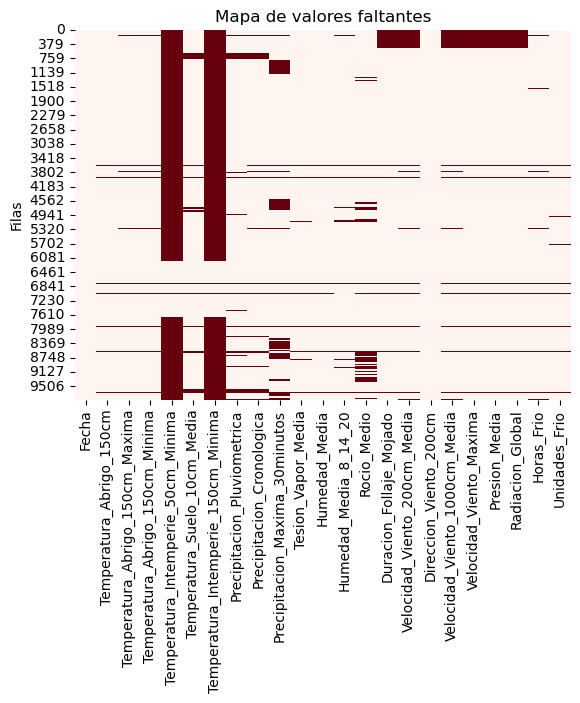

In [32]:
# Visualización simple de patrón de faltantes

sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Mapa de valores faltantes')
plt.ylabel('Filas')
plt.show()

#### Valores atípicos

### Resumen estadístico

In [ ]:
# Obtener las principales medidas de posición y de dispersión de cada variable.

### Visualizaciones: análisis univariado, bivariado y multivariado

### Preprocesamiento y limpieza avanzada de datos.

### Conclusiones parciales

In [ ]:
# Elaborar conclusiones parciales que sinteticen los principales hallazgos del análisis
# exploratorio y las decisiones de preprocesamiento adoptadas.

## Modelado, Evaluación e Interpretabilidad

### Selección de modelos

Seleccionar al menos dos algoritmos de machine learning adecuados para el problema
planteado y justificar su elección.

### Entrenamiento, validación y optimización de modelos

Realizar el entrenamiento de los modelos seleccionados, incorporando técnicas de
validación cruzada (cross-validation) y la optimización de hiperparámetros mediante algún
método de búsqueda (por ejemplo, Grid Search, Random Search u otros).

Describir el esquema de validación utilizado y los principales hiperparámetros optimizados.

### Evaluación y análisis de resultados

Evaluar y comparar el desempeño de los modelos utilizando métricas adecuadas para el
problema.

Visualizar y analizar el output de los modelos, incluyendo comparaciones entre valores
reales y predichos sobre el conjunto de test.

Detallar y representar gráficamente la “confianza” o incertidumbre asociada a las
predicciones, cuando corresponda.

### Interpretabilidad de los modelos

Realizar un análisis de interpretabilidad de los modelos entrenados, identificando las variables
más relevantes y discutiendo su impacto en las predicciones.

### Conclusiones

Elaborar conclusiones integradoras a partir de los resultados obtenidos, destacando
fortalezas, limitaciones y posibles mejoras
